# Preparation for future job hunt 

I want to use this notebook as a playground, but also as an overview for where to look for jobs.

For this I want to use several criteria:
* What countries am I interested in to move to
* What countries is my wife interested in to move to
* What are the regulations to start working in those countries
* How popular is data science there (data scientists per capita / in total)
* How many jobs are there for data scientists
* How many jobs are there for deep learning / machine learning
* How many professionals are there per job offer
* What is the average wage in that place

Some of my data will come from this source with data from 2020: [Towards data science](https://towardsdatascience.com/where-it-is-the-easiest-to-get-data-science-job-not-where-you-may-think-28e33ec652b3), recent data from [365 Data Science](https://365datascience.com/career-advice/data-science-salaries-around-the-world/) updated with own data.

In [1]:
# # installing into jupyter
# !pip install geopandas
# !pip install folium mapclassify

In [2]:
# importing important stuff
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import folium

## Download and show world map

In [3]:
# Load the datasets
detail_df = gpd.read_file('ne_110m_admin_0_scale_rank.zip')
c_v = gpd.read_file('https://osmtoday.com/africa/cape_verde.geojson')
romania = gpd.read_file('romania-with-regions_.geojson')
flanders = gpd.read_file('https://osmtoday.com/europe/belgium/flanders.geojson')

In [4]:
cluj = romania.loc[romania['name'].str.contains('cluj', case=False)]['geometry'].values[0]
timi = romania.loc[romania['name'].str.contains('timi', case=False)]['geometry'].values[0]

In [5]:
# Adding Cape Verde, Flanders and Transylvania to the df
detail_df.loc[len(detail_df.index)] = [1, 'Adm-0 scale ranks', 1, 'CPV', 'CPV', 'CVP', 'Cape Verde', c_v['geometry'].values[0]]
detail_df.loc[len(detail_df.index)] = [1, 'Adm-0 scale ranks', 1, 'TIMI', 'TIMI', 'TIMI', 'Timisoara', timi]
detail_df.loc[len(detail_df.index)] = [1, 'Adm-0 scale ranks', 1, 'CLUJ', 'CLUJ', 'CLUJ', 'Cluj', cluj]
detail_df.loc[len(detail_df.index)] = [1, 'Adm-0 scale ranks', 1, 'FLA', 'FLA', 'FLA', 'Flanders', flanders['geometry'].values[0]]

In [6]:
detail_df[detail_df['sr_geounit'].str.contains('ux')]

scalerank         featurecla  labelrank sr_sov_a3 sr_adm0_a3 sr_gu_a3  \
151          1  Adm-0 scale ranks          1       LUX        LUX      LUX   

     sr_geounit                                           geometry  
151  Luxembourg  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...

In [7]:
detail_df.explore()

## Create a funtion to call maps

In [8]:
def get_map(df, column, name, location=[50.406, 10.110], zoom_start = 4, bins=8, fill_opacity=0.7, fill_color="RdYlGn", show_legend=True, map_title=""):
    """
    Will return a map. It will always compare with 'sr_geounit'.
    Compulsary Inputs: dataframe name, column to compare with and legend name.
    Other inputs: center of map (location), zoom_start, bins, fill_opacity and fill_color, show legend
    """

    map = folium.Map(location=location, zoom_start = zoom_start, tiles="Cartodb Positron", width="%100", height="%100")

    choropleth = folium.Choropleth(
        name = "Test",
        geo_data=df,
        data=df,
        fill_color=fill_color,
        fill_opacity=fill_opacity,
        bins=bins,
        columns=['sr_geounit', column],   
        legend_name= name,
        key_on='feature.properties.sr_geounit',
        line_opacity = 0.1,
        );
    
    if show_legend == False:
        for key in choropleth._children:
            if key.startswith('color_map'):
                del(choropleth._children[key])

    choropleth.add_to(map)

    title_html = f'<h3 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h1>'
    map.get_root().html.add_child(folium.Element(title_html))
      
    return map




## Where I want to live

### Code and charts

In [9]:
# Some countries I want to work in:
my_countries = ["Cape Verde", "Montenegro", "Cluj", "Flanders", "Netherlands", "El Salvador", "Belize", "Argentina", "Portugal", "Scotland", "Luxembourg", "Austria", "Switserland", "Slovakia", "Hungary", "Serbia", "Greece", "Belarus", "Finland", "Russia", "Cyprus", "Timisoara"]
his_countries_df = pd.DataFrame({'countries': my_countries, 'his_rank': [1, 1, 1, 0.5, 0.1, 0.7, 0.6, 0.6, 0.7, 0.4, 1.0, 0.7, 0.65, 0.9, 0.8, 0.9, 0.7, 1.0, 0.75, 1.0, 0.7, 0.6]})
his_countries_df

countries  his_rank
0    Cape Verde      1.00
1    Montenegro      1.00
2          Cluj      1.00
3      Flanders      0.50
4   Netherlands      0.10
5   El Salvador      0.70
6        Belize      0.60
7     Argentina      0.60
8      Portugal      0.70
9      Scotland      0.40
10   Luxembourg      1.00
11      Austria      0.70
12  Switserland      0.65
13     Slovakia      0.90
14      Hungary      0.80
15       Serbia      0.90
16       Greece      0.70
17      Belarus      1.00
18      Finland      0.75
19       Russia      1.00
20       Cyprus      0.70
21    Timisoara      0.60

In [10]:
extended_df = detail_df.copy()
extended_df = pd.merge(detail_df, his_countries_df, left_on=["sr_geounit"], right_on=["countries"], how="left")
extended_df = extended_df.drop(['countries'], axis=1)
extended_df['his_rank'] = extended_df['his_rank'].fillna(0)
extended_df = extended_df.set_crs(4326, allow_override=True)
extended_df

scalerank         featurecla  labelrank sr_sov_a3 sr_adm0_a3 sr_gu_a3  \
0            1  Adm-0 scale ranks          1       FJI        FJI      FJI   
1            1  Adm-0 scale ranks          1       TZA        TZA      TZA   
2            1  Adm-0 scale ranks          1       SAH        SAH      SAH   
3            1  Adm-0 scale ranks          1       CAN        CAN      CAN   
4            1  Adm-0 scale ranks          1       US1        USA      USA   
..         ...                ...        ...       ...        ...      ...   
289          1  Adm-0 scale ranks          1       RUS        RUS      RUS   
290          1  Adm-0 scale ranks          1       CPV        CPV      CVP   
291          1  Adm-0 scale ranks          1      TIMI       TIMI     TIMI   
292          1  Adm-0 scale ranks          1      CLUJ       CLUJ     CLUJ   
293          1  Adm-0 scale ranks          1       FLA        FLA      FLA   

                   sr_geounit  \
0                        Fiji   
1                    Tanzania   
2              Western Sahara   
3                      Canada   
4    United States of America   
..                        ...   
289                    Russia   
290                Cape Verde   
291                 Timisoara   
292                      Cluj   
293                  Flanders   

                                              geometry  his_rank  
0    POLYGON ((180.00000 -16.06713, 180.00000 -16.5...       0.0  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...       0.0  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...       0.0  
3    POLYGON ((-122.84000 49.00000, -122.97421 49.0...       0.0  
4    POLYGON ((-122.84000 49.00000, -120.00000 49.0...       0.0  
..                                                 ...       ...  
289  POLYGON ((33.43599 45.97192, 33.69946 46.21957...       1.0  
290  MULTIPOLYGON (((-25.28500 16.66000, -25.44000 ...       1.0  
291  MULTIPOLYGON (((20.70416 46.16142, 20.70606 46...       0.6  
292  MULTIPOLYGON (((24.02456 47.36161, 24.02522 47...       1.0  
293  MULTIPOLYGON (((5.70000 50.78000, 5.73500 50.7...       0.5  

[294 rows x 9 columns]

In [11]:
his_map_data = [extended_df, 'his_rank', 'His interest in moving to country', [40.406, -10.110], 3, 8, 0.6, "Blues"]
his_map = get_map(*his_map_data)

### Map

In [12]:
his_map

## Where she wants to live

### Code and charts

In [13]:
her_countries = ["Luxembourg", "Portugal", "Finland", "Sweden", "Denmark", "Cluj", "Montenegro", "Serbia", "Croatia", "Czech Republic", "Cyprus", "Austria"]
her_rating = [0.6, 1, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 1, 0.6]
her_countries_df = pd.DataFrame({'countries': her_countries, 'her_rank': her_rating})
her_countries_df

countries  her_rank
0       Luxembourg       0.6
1         Portugal       1.0
2          Finland       0.6
3           Sweden       0.6
4          Denmark       0.6
5             Cluj       0.6
6       Montenegro       0.6
7           Serbia       0.6
8          Croatia       0.6
9   Czech Republic       0.6
10          Cyprus       1.0
11         Austria       0.6

In [14]:
extended_df = extended_df.copy()
extended_df = pd.merge(extended_df, her_countries_df, left_on=["sr_geounit"], right_on=["countries"], how="left")
extended_df = extended_df.drop(['countries'], axis=1)
extended_df['her_rank'] = extended_df['her_rank'].fillna(0)
extended_df = extended_df.set_crs(4326, allow_override=True)
extended_df

scalerank         featurecla  labelrank sr_sov_a3 sr_adm0_a3 sr_gu_a3  \
0            1  Adm-0 scale ranks          1       FJI        FJI      FJI   
1            1  Adm-0 scale ranks          1       TZA        TZA      TZA   
2            1  Adm-0 scale ranks          1       SAH        SAH      SAH   
3            1  Adm-0 scale ranks          1       CAN        CAN      CAN   
4            1  Adm-0 scale ranks          1       US1        USA      USA   
..         ...                ...        ...       ...        ...      ...   
289          1  Adm-0 scale ranks          1       RUS        RUS      RUS   
290          1  Adm-0 scale ranks          1       CPV        CPV      CVP   
291          1  Adm-0 scale ranks          1      TIMI       TIMI     TIMI   
292          1  Adm-0 scale ranks          1      CLUJ       CLUJ     CLUJ   
293          1  Adm-0 scale ranks          1       FLA        FLA      FLA   

                   sr_geounit  \
0                        Fiji   
1                    Tanzania   
2              Western Sahara   
3                      Canada   
4    United States of America   
..                        ...   
289                    Russia   
290                Cape Verde   
291                 Timisoara   
292                      Cluj   
293                  Flanders   

                                              geometry  his_rank  her_rank  
0    POLYGON ((180.00000 -16.06713, 180.00000 -16.5...       0.0       0.0  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...       0.0       0.0  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...       0.0       0.0  
3    POLYGON ((-122.84000 49.00000, -122.97421 49.0...       0.0       0.0  
4    POLYGON ((-122.84000 49.00000, -120.00000 49.0...       0.0       0.0  
..                                                 ...       ...       ...  
289  POLYGON ((33.43599 45.97192, 33.69946 46.21957...       1.0       0.0  
290  MULTIPOLYGON (((-25.28500 16.66000, -25.44000 ...       1.0       0.0  
291  MULTIPOLYGON (((20.70416 46.16142, 20.70606 46...       0.6       0.0  
292  MULTIPOLYGON (((24.02456 47.36161, 24.02522 47...       1.0       0.6  
293  MULTIPOLYGON (((5.70000 50.78000, 5.73500 50.7...       0.5       0.0  

[294 rows x 10 columns]

In [15]:
her_map_data = [extended_df, 'her_rank', 'Her interest in moving to country', [40.406, -10.110], 3, 8, 0.6, "BuGn"]
her_map = get_map(*her_map_data)

### Map

In [16]:
her_map

## Where we both want to live
This will be the basis for further investigation: the other countries will be ignored or with invalid data

### Code and charts

In [17]:
countries = pd.merge(his_countries_df, her_countries_df, on='countries')
countries['rank_both'] = round((countries['his_rank'] + countries['her_rank']) * 5, 0).astype('int')
countries['both'] = 1
both_countries_df = pd.merge(extended_df, countries, left_on=["sr_geounit"], right_on=["countries"], how="right")
both_extended_df = both_countries_df.drop(['countries', 'scalerank', 'labelrank', 'sr_sov_a3', 'sr_adm0_a3', 'sr_gu_a3', 'featurecla'], axis=1)
both_extended_df['both'] = both_extended_df['both'].fillna(0)
both_extended_df

sr_geounit                                           geometry  his_rank_x  \
0  Montenegro  POLYGON ((20.07070 42.58863, 19.80161 42.50009...        1.00   
1        Cluj  MULTIPOLYGON (((24.02456 47.36161, 24.02522 47...        1.00   
2    Portugal  POLYGON ((-9.03482 41.88057, -8.67195 42.13469...        0.70   
3  Luxembourg  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...        1.00   
4     Austria  POLYGON ((16.97967 48.12350, 16.90375 47.71487...        0.70   
5      Serbia  POLYGON ((18.82982 45.90887, 18.82984 45.90888...        0.90   
6     Finland  POLYGON ((28.59193 69.06478, 28.44594 68.36461...        0.75   
7      Cyprus  POLYGON ((32.73178 35.14003, 32.91957 35.08783...        0.70   

   her_rank_x  his_rank_y  her_rank_y  rank_both  both  
0         0.6        1.00         0.6          8     1  
1         0.6        1.00         0.6          8     1  
2         1.0        0.70         1.0          8     1  
3         0.6        1.00         0.6          8     1  
4         0.6        0.70         0.6          6     1  
5         0.6        0.90         0.6          8     1  
6         0.6        0.75         0.6          7     1  
7         1.0        0.70         1.0          8     1

In [18]:
both_map_data = [both_extended_df, 'rank_both', 'Both interest in moving to country', [40.406, -10.110], 3, 3, 0.6, "BuGn"]
both_map = get_map(*both_map_data)

### Map

In [19]:
both_map

## Jobs per country
I'm going to have a look at the following jobs per country: "Data Science (DS)", "Junior Data Science (JDS)", "Deep Learning (DL)" and "PyTorch (PT)". I won't have an in-depth view at the jobs itself: just looking at the amount will give me a clear enough view about the amount per country.

I checked following websites: LikedIn (LI), Glassdoor (GD) and ai-jobs.net (AI). I divided this by the inhabitants to have a look at jobs per inhabitant.

### Data preparation

In [20]:
jobs = pd.read_csv("jobs_per_region.csv", index_col=0)

In [21]:
jobs_countries = pd.merge(countries, jobs, on='countries').drop(['his_rank', 'her_rank', 'both'], axis=1)
jobs_countries['population'] = [619200, 680000, 10330000, 640000, 8956000, 6834000, 5541000, 1244000]

# Summing together all jobs found. There are doubles in here, but I want a general idea to compare:
# important jobs will be posted on more platforms

jobs_countries['sum_all'] = jobs_countries[['LI-DS', 'LI-JDS', 'LI-DL', 'LI-PT', 'GD-DS',
       'GD-JDS', 'GD-DL', 'GD-PT', 'AI-DS', 'AI-JDS', 'AI-DL', 'AI-PT']].sum(axis=1)

jobs_countries['job_pop_all'] = jobs_countries['sum_all'] / jobs_countries['population'] * 100000

jobs_countries

countries  rank_both  LI-DS  LI-JDS  LI-DL  LI-PT  GD-DS  GD-JDS  GD-DL  \
0  Montenegro          8     11       0      2      0      0       0      0   
1        Cluj          8     63       5     19     24    139      18     11   
2    Portugal          8   1198      19    209    164    229      33     38   
3  Luxembourg          8    209       2     87     10     97       0     41   
4     Austria          6    530      28     91     30     82      12     35   
5      Serbia          8    125       1     20      2      0       0      0   
6     Finland          7    326       2     57    163     31       2     12   
7      Cyprus          8    104       4     19     11      0       0      0   

   GD-PT  AI-DS  AI-JDS  AI-DL  AI-PT  population  sum_all  job_pop_all  
0      0      0       0      0      0      619200       13     2.099483  
1      5     14       2      8      5      680000      313    46.029412  
2     51    250       5     14      7    10330000     2217    21.461762  
3     29      8       0      2      1      640000      486    75.937500  
4     26     12       0      2      0     8956000      848     9.468513  
5      0      8       0      3      0     6834000      159     2.326602  
6     11     23       2     11      0     5541000      640    11.550262  
7      0      2       2      0      0     1244000      142    11.414791

In [22]:
jobs_countries

countries  rank_both  LI-DS  LI-JDS  LI-DL  LI-PT  GD-DS  GD-JDS  GD-DL  \
0  Montenegro          8     11       0      2      0      0       0      0   
1        Cluj          8     63       5     19     24    139      18     11   
2    Portugal          8   1198      19    209    164    229      33     38   
3  Luxembourg          8    209       2     87     10     97       0     41   
4     Austria          6    530      28     91     30     82      12     35   
5      Serbia          8    125       1     20      2      0       0      0   
6     Finland          7    326       2     57    163     31       2     12   
7      Cyprus          8    104       4     19     11      0       0      0   

   GD-PT  AI-DS  AI-JDS  AI-DL  AI-PT  population  sum_all  job_pop_all  
0      0      0       0      0      0      619200       13     2.099483  
1      5     14       2      8      5      680000      313    46.029412  
2     51    250       5     14      7    10330000     2217    21.461762  
3     29      8       0      2      1      640000      486    75.937500  
4     26     12       0      2      0     8956000      848     9.468513  
5      0      8       0      3      0     6834000      159     2.326602  
6     11     23       2     11      0     5541000      640    11.550262  
7      0      2       2      0      0     1244000      142    11.414791

In [23]:
# adding geodata
jobs_countries = pd.merge(extended_df[['sr_geounit', 'geometry']], jobs_countries, left_on=["sr_geounit"], right_on=["countries"], how="right")
jobs_countries['rank_job_pop'] = round(jobs_countries['job_pop_all'] / 8).astype('int')
jobs_countries['rank_PT'] = round(jobs_countries['LI-PT']/17).astype('int')
jobs_countries['rank_av_jobs'] = round((jobs_countries['rank_job_pop'] + jobs_countries['rank_PT'])/1.25).astype('int')

jobs_countries

sr_geounit                                           geometry   countries  \
0  Montenegro  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  Montenegro   
1        Cluj  MULTIPOLYGON (((24.02456 47.36161, 24.02522 47...        Cluj   
2    Portugal  POLYGON ((-9.03482 41.88057, -8.67195 42.13469...    Portugal   
3  Luxembourg  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...  Luxembourg   
4     Austria  POLYGON ((16.97967 48.12350, 16.90375 47.71487...     Austria   
5      Serbia  POLYGON ((18.82982 45.90887, 18.82984 45.90888...      Serbia   
6     Finland  POLYGON ((28.59193 69.06478, 28.44594 68.36461...     Finland   
7      Cyprus  POLYGON ((32.73178 35.14003, 32.91957 35.08783...      Cyprus   

   rank_both  LI-DS  LI-JDS  LI-DL  LI-PT  GD-DS  GD-JDS  ...  AI-DS  AI-JDS  \
0          8     11       0      2      0      0       0  ...      0       0   
1          8     63       5     19     24    139      18  ...     14       2   
2          8   1198      19    209    164    229      33  ...    250       5   
3          8    209       2     87     10     97       0  ...      8       0   
4          6    530      28     91     30     82      12  ...     12       0   
5          8    125       1     20      2      0       0  ...      8       0   
6          7    326       2     57    163     31       2  ...     23       2   
7          8    104       4     19     11      0       0  ...      2       2   

   AI-DL  AI-PT  population  sum_all  job_pop_all  rank_job_pop  rank_PT  \
0      0      0      619200       13     2.099483             0        0   
1      8      5      680000      313    46.029412             6        1   
2     14      7    10330000     2217    21.461762             3       10   
3      2      1      640000      486    75.937500             9        1   
4      2      0     8956000      848     9.468513             1        2   
5      3      0     6834000      159     2.326602             0        0   
6     11      0     5541000      640    11.550262             1       10   
7      0      0     1244000      142    11.414791             1        1   

   rank_av_jobs  
0             0  
1             6  
2            10  
3             8  
4             2  
5             0  
6             9  
7             2  

[8 rows x 22 columns]

In [24]:
all_jobs_pop_map_data = [jobs_countries, 'job_pop_all', 'Comparison of jobs amount per country', [50.406, 10.110], 4, 8, 0.7, "RdYlGn"]
all_jobs_pop_map = get_map(*all_jobs_pop_map_data)

### Map jobs per population

In [25]:
all_jobs_pop_map

### Linked-In Jobs Data Science

In [26]:
# map code
LI_DS_map_data = [jobs_countries, 'LI-DS', 'Comparison of jobs amount per country', [50.406, 15.110], 4, 8, 0.7, "RdYlGn"]
LI_DS_map = get_map(*LI_DS_map_data)

In [27]:
LI_DS_map

## Specialists per country
For this I'm going to have a look how many bootcamps and other educational institutions I can find that are teaching data science. This might give an indication about how many data scientist there are in that country.
I scraped this website for this: [coursereport](https://www.coursereport.com/tracks/data-science)

### Scraping for data

In [28]:
# import requests
# from bs4 import BeautifulSoup
# from collections import Counter


# url = "https://www.coursereport.com/tracks/data-science"
# PAGES_TO_SCRAPE = 15

# city_names = []
# full_pages = []


# for page in range(PAGES_TO_SCRAPE):
#     response = requests.get(
#         url,
#         params={'page': page+1}
#         )

#     if response:
#         soup = BeautifulSoup(response.content, "html.parser")
#         full_pages.append(soup)
#         for link in soup.find_all('a', href=True):
#             if '/cities/' in link['href']:
#                 city_name = link.text.strip()
#                 # Exclude city names ending with 'Bootcamps'
#                 if not city_name.endswith('Bootcamps'):
#                     if 'online' not in city_name.lower():
#                         city_names.append(city_name)
        
#     else:
#         break

# unsorted_city_names = city_names
# city_names_counter = Counter(city_names)
# cities = pd.DataFrame.from_dict(city_names_counter, orient='index').reset_index()
# cities.to_csv("data\bootcamp_cities.csv");

### Data preparation

In [29]:
# Read CV not to scrape every time

cities = pd.read_csv("data\bootcamp_cities.csv", index_col=0)
cities.columns = ['cities', 'bootcamps']
cities = cities.sort_values(by='bootcamps', ascending=False)
cities

cities  bootcamps
23          Madrid         16
1           London         16
37   New York City         14
11          Berlin         13
20       Barcelona         12
..             ...        ...
95        Columbus          1
90     Chapel Hill          1
89          Athens          1
87          Bilbao          1
176      Stuttgart          1

[177 rows x 2 columns]

In [30]:
# Getting city data points

cities_geo = gpd.read_file('ne_10m_populated_places_simple.zip')
cities_geo.head(5)
cities_geo[cities_geo['name'].str.contains('Glasgow')]

scalerank  natscale  labelrank       featurecla         name namepar  \
1612          8        10        2.0  Populated place  New Glasgow    None   
1833          7        20        1.0  Populated place      Glasgow    None   
6877          3       110        5.0  Populated place      Glasgow    None   

     namealt    nameascii  adm0cap  capalt  ...  pop_max  pop_min  pop_other  \
1612    None  New Glasgow        0       0  ...    20322    19445    18774.0   
1833    None      Glasgow        0       0  ...     3240     3048     3240.0   
6877    None      Glasgow        0       0  ...  1160000   610268     3240.0   

     rank_max rank_min meganame      ls_name min_zoom       ne_id  \
1612        7        6     None  New Glasgow      7.0  1159131581   
1833        4        4     None     Glasgow1      6.7  1159132481   
6877       12       11  Glasgow     Glasgow2      4.0  1159150591   

                         geometry  
1612   POINT (-62.63332 45.58328)  
1833  POINT (-106.63526 48.18397)  
6877    POINT (-4.23910 55.86227)  

[3 rows x 32 columns]

In [31]:
# Only keep biggest cities

cities_geo = cities_geo.groupby('name', as_index=False).max('pop_max')
cities_geo[cities_geo['name'].str.contains('Glasgow')]

name  scalerank  natscale  labelrank  adm0cap  capalt  worldcity  \
2152      Glasgow          7       110        5.0        0       0          0   
4346  New Glasgow          8        10        2.0        0       0          0   

      megacity   latitude  longitude  pop_max  pop_min  pop_other  rank_max  \
2152         1  55.876351  -4.252653  1160000   610268     3240.0        12   
4346         0  45.583276 -62.633319    20322    19445    18774.0         7   

      rank_min  min_zoom       ne_id  
2152        11       6.7  1159150591  
4346         6       7.0  1159131581

In [32]:
# Modifying cities in Europe with different way or writing

cities_geo = cities_geo.replace('Zürich', 'Zurich')
cities_geo = cities_geo.replace('St. Petersburg', 'Saint Petersburg')
cities_geo = cities_geo.replace('Kyiv', 'Kiev')
cities_geo = cities_geo.replace('København', 'Copenhagen')
cities_geo = cities_geo.replace('La Coruña', 'Galicia')
cities_geo = cities_geo.replace('Göteborg', 'Gothenburg')

In [33]:
cities_geo

name  scalerank  natscale  labelrank  adm0cap  capalt  \
0                'Ataq          9         5        6.0        0       0   
1     's-Hertogenbosch         10         1        8.0        0       0   
2           25 de Mayo          8        10        3.0        0       0   
3      28 de Noviembre          8        10        3.0        0       0   
4              Aalborg          7        20        8.0        0       0   
...                ...        ...       ...        ...      ...     ...   
7095            Şirvan          7        20        8.0        0       0   
7096          Šiauliai          8        10        8.0        0       0   
7097           Šibenik         10         1        8.0        0       0   
7098            Žilina          7        20        7.0        0       0   
7099         Ṭarābulus          6        30        8.0        0       0   

      worldcity  megacity   latitude  longitude  pop_max  pop_min  pop_other  \
0             0         0  14.550003  46.800001    37315    37315        0.0   
1             0         0  51.683337   5.316661   134520   134520        0.0   
2             0         0 -37.800033 -67.683295    17430    17430        0.0   
3             0         0 -51.650040 -72.300016     5300     5300        0.0   
4             0         0  57.033714   9.916593   122219   101616    92764.0   
...         ...       ...        ...        ...      ...      ...        ...   
7095          0         0  39.932303  48.920259    70684    70220    70684.0   
7096          0         0  55.938639  23.325026   133528   130587   130840.0   
7097          0         0  43.727222  15.905833    37112    37112        0.0   
7098          0         0  49.219824  18.749388    87625    85985    81121.0   
7099          0         0  34.421950  35.868050   530000   192572   476908.0   

      rank_max  rank_min  min_zoom       ne_id  
0            7         7       7.0  1159122053  
1            9         9       9.0  1159116023  
2            6         6       7.0  1159131817  
3            5         5       7.0  1159131631  
4            9         9       6.1  1159143049  
...        ...       ...       ...         ...  
7095         8         8       6.1  1159144565  
7096         9         9       7.0  1159128255  
7097         7         7       7.0  1159118027  
7098         8         8       6.7  1159136359  
7099        11         9       6.0  1159148623  

[7100 rows x 17 columns]

In [34]:
# Merging bootcamps and geometry

cities = pd.merge(cities, cities_geo[['name', 'latitude', 'longitude']], left_on='cities', right_on="name", how="left")

In [35]:
# Cleaning data

cities = cities.drop_duplicates('cities')

# I checked all cities which weren't automatically recognised and added the most important ones (for me) above in the geo_cities
# This was the easiest way not to lose the geometry

cities[cities['name'].isnull()]    # checking   
cities = cities.dropna()           # dropping the NaNs which we don't need
cities.sample(5)

city_coords = []
# added a new row with readable data for the map
for index, row in cities.iterrows():
    city_coords.append([row['latitude'], row['longitude'], row['bootcamps']])

cities['city_coords'] = city_coords

In [36]:
cities

cities  bootcamps       name   latitude  longitude  \
0       Madrid         16     Madrid  40.401972  -3.685298   
1       London         16     London  51.501941  -0.118668   
3       Berlin         13     Berlin  52.523765  13.399603   
4    Barcelona         12  Barcelona  41.385245   2.181425   
5        Paris         11      Paris  48.868639   2.331390   
..         ...        ...        ...        ...        ...   
171      Akron          1      Akron  41.070399 -81.519996   
172   Columbus          1   Columbus  39.981920 -82.991956   
174     Athens          1     Athens  37.985272  23.731375   
175     Bilbao          1     Bilbao  43.249982  -2.929987   
176  Stuttgart          1  Stuttgart  48.779980   9.199996   

                    city_coords  
0    [40.401972, -3.685298, 16]  
1    [51.501941, -0.118668, 16]  
3    [52.523765, 13.399603, 13]  
4     [41.385245, 2.181425, 12]  
5      [48.868639, 2.33139, 11]  
..                          ...  
171  [41.070399, -81.519996, 1]  
172   [39.98192, -82.991956, 1]  
174   [37.985272, 23.731375, 1]  
175   [43.249982, -2.929987, 1]  
176     [48.77998, 9.199996, 1]  

[152 rows x 6 columns]

In [37]:
import folium
from folium.plugins import HeatMap

map_obj = folium.Map(location = [45.406, 10.110], zoom_start = 4)

lats_longs = cities['city_coords']

HeatMap(lats_longs).add_to(map_obj);

### Map

In [38]:
map_obj

## Difficulties per country
I'm going to have a look to the different countries how easy it is to adapt and move there. I'll look at the level of English / Russian, difficulties of the local language, do we need permits to move / work and how easy it is to get to the country. Those features are purely my experience and what I think. This might be wrong...

For the high quality healthcare, which is important for me, I checked the following website and took the highest ranked hospital: https://hospitals.webometrics.info/en/ranking_europe

I tried to give the hospitals a ranking in percentage. As the spread was too big I searched for a formula that gives a ranking which I was happy with: 90% for the highest ones, 60% for the ones around rank 1000, 50% for the 4000 and around 40% the above 10.000. I rounded them eventually to have the same values as the other parameters.

### Data preparation

In [39]:
values = [10888, 1836, 189, 1966, 139, 334, 225, 4187]
hospital_rank = [round((10 - np.log(value) + 2) / 145 * 200) for value in values]
hospital_rank

[4, 6, 9, 6, 10, 9, 9, 5]

The level of English is taken from the website of [EF](https://www.ef.com/wwen/epi/). The EF English Proficiency Index (EF EPI) is the world’s largest ranking of countries/regions by adult English skills. This data is from 2023, so recent. The percentage of English speakers comes from [Wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_English-speaking_population) with some extra info.
* The level of English in Cluj is higher than the level in Bucharest (according to [EF](https://www.ef.com/assetscdn/WIBIwq6RdJvcD9bc8RMd/cefcom-epi-site/fact-sheets/2023/ef-epi-fact-sheet-romania-english.pdf)). With a level of 608, Cluj region is on the 7th place in Europe. The percentage has been set at 70 to be comparable with other data with a similar EF score.
* Portugal did not match the level of EF. After checking the source of Wikipedia, this was data from 2012. I added the data of [Statista](https://www.statista.com/statistics/990547/countries-in-europe-for-english/) which corresponded more to the EF data.
* Montenegro again had no data. I found very old data for the [Montenegrin Statistics Office](https://www.monstat.org/eng/novosti.php?id=294#:~:text=In%20Montenegro%2C%20the%20biggest%20number,French%203%20%25%20of%20observed%20population.) which corresponded with more recent data I found online. I still looks too low though, as there is a lot of tourism and youth learning English. In the end I decided to take the level in English in Albania from Statista, as the level in Montenegro will definitely not be lower.

In [40]:
safety =  pd.read_csv("level_of_safety.csv", index_col=0)
safety['hospital_rank'] = hospital_rank

In [41]:
safety

eng_lvl  perc_eng  local_language  permits  location  health  \
countries                                                                  
Montenegro       39        51               5       10         6       2   
Cluj              7        70               3       10         8       6   
Portugal          8        60               8       10         7       8   
Luxembourg       22        56              10       10        10      10   
Austria           3        73              10       10         8       8   
Serbia           24        60               5        5         4       7   
Finland          14        70               2       10         6       8   
Cyprus            1        75               8       10         4       4   

            hospitals  jobs_her  hospital_rank  
countries                                       
Montenegro      10888         2              4  
Cluj             1836         4              6  
Portugal          189        10              9  
Luxembourg       1966         8              6  
Austria           139         8             10  
Serbia            334         6              9  
Finland           225         7              9  
Cyprus           4187         9              5

In [42]:
ranked_lvl = (10 - (safety['eng_lvl'] / 5)).astype('int')
ranked_perc = (safety['perc_eng'] / 7.5).astype('int')
safety_ranked = safety[['local_language', 'permits', 'location', 'health', 'jobs_her', 'hospital_rank']].copy()

safety_ranked['eng_lvl_rank'] = ranked_lvl
safety_ranked['perc_eng_rank'] = ranked_perc
safety_ranked['safety_mean'] = round(safety_ranked.mean(axis=1)).astype('int')
safety_ranked

local_language  permits  location  health  jobs_her  \
countries                                                         
Montenegro               5       10         6       2         2   
Cluj                     3       10         8       6         4   
Portugal                 8       10         7       8        10   
Luxembourg              10       10        10      10         8   
Austria                 10       10         8       8         8   
Serbia                   5        5         4       7         6   
Finland                  2       10         6       8         7   
Cyprus                   8       10         4       4         9   

            hospital_rank  eng_lvl_rank  perc_eng_rank  safety_mean  
countries                                                            
Montenegro              4             2              6            5  
Cluj                    6             8              9            7  
Portugal                9             8              8            8  
Luxembourg              6             5              7            8  
Austria                10             9              9            9  
Serbia                  9             5              8            6  
Finland                 9             7              9            7  
Cyprus                  5             9             10            7

In [43]:
# adding geodata
safety_geo = pd.merge(extended_df[['sr_geounit', 'geometry']], safety_ranked, left_on=["sr_geounit"], right_on=["countries"], how="right")

safety_geo

sr_geounit                                           geometry  \
0  Montenegro  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
1        Cluj  MULTIPOLYGON (((24.02456 47.36161, 24.02522 47...   
2    Portugal  POLYGON ((-9.03482 41.88057, -8.67195 42.13469...   
3  Luxembourg  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...   
4     Austria  POLYGON ((16.97967 48.12350, 16.90375 47.71487...   
5      Serbia  POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
6     Finland  POLYGON ((28.59193 69.06478, 28.44594 68.36461...   
7      Cyprus  POLYGON ((32.73178 35.14003, 32.91957 35.08783...   

   local_language  permits  location  health  jobs_her  hospital_rank  \
0               5       10         6       2         2              4   
1               3       10         8       6         4              6   
2               8       10         7       8        10              9   
3              10       10        10      10         8              6   
4              10       10         8       8         8             10   
5               5        5         4       7         6              9   
6               2       10         6       8         7              9   
7               8       10         4       4         9              5   

   eng_lvl_rank  perc_eng_rank  safety_mean  
0             2              6            5  
1             8              9            7  
2             8              8            8  
3             5              7            8  
4             9              9            9  
5             5              8            6  
6             7              9            7  
7             9             10            7

In [44]:
# map code
safety_mean_map_data = [safety_geo, 'safety_mean', 'Relative safety to live in that country']
safety_mean_map = get_map(*safety_mean_map_data)

### Map

In [45]:
safety_mean_map

## Wages per country
It's difficult to compare wages as there is not a single place having wages for all countries. I made an average of the data of [SalaryExpert](https://www.salaryexpert.com/salary/browse/countries/data-scientist), which was not complete, and a search for 'Machine Learning Engineer' wages on Glassdoor.
* The data for Montenegro is the only data which had low confidence. 
* yr = year; m = month
* se = SalaryExpert, gd = Glassdoor
* The column GD per month is original data per month or recalculated data from GD year

As usual: even if the salarie don't match with the reality, they will give me an idea to compare countries.

### Data preparation

In [46]:
wages =  pd.read_csv("wages.csv", index_col=0)

In [47]:
wages

wage_se_yr  wage_se_m  wage_gd_ML_yr  wage_gd_ML_m  av_wage_mon  \
countries                                                                     
Montenegro         NaN        NaN            NaN          2000         2000   
Cluj           32855.0     2738.0            NaN          2612         2675   
Portugal       55327.0     4611.0            NaN          4000         4305   
Luxembourg    142142.0    11845.0        89000.0          7417         9631   
Austria       111259.0     9272.0        75000.0          6250         7761   
Serbia             NaN        NaN            NaN          3333         3333   
Finland       103307.0     8609.0            NaN          9000         8804   
Cyprus             NaN        NaN        39000.0          3250         3250   

            rounded_wage  
countries                 
Montenegro             2  
Cluj                   3  
Portugal               4  
Luxembourg            10  
Austria                8  
Serbia                 3  
Finland                9  
Cyprus                 3

In [48]:
# adding geodata
wages_geo = pd.merge(extended_df[['sr_geounit', 'geometry']], wages, left_on=["sr_geounit"], right_on=["countries"], how="right")

wages_geo

sr_geounit                                           geometry  wage_se_yr  \
0  Montenegro  POLYGON ((20.07070 42.58863, 19.80161 42.50009...         NaN   
1        Cluj  MULTIPOLYGON (((24.02456 47.36161, 24.02522 47...     32855.0   
2    Portugal  POLYGON ((-9.03482 41.88057, -8.67195 42.13469...     55327.0   
3  Luxembourg  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...    142142.0   
4     Austria  POLYGON ((16.97967 48.12350, 16.90375 47.71487...    111259.0   
5      Serbia  POLYGON ((18.82982 45.90887, 18.82984 45.90888...         NaN   
6     Finland  POLYGON ((28.59193 69.06478, 28.44594 68.36461...    103307.0   
7      Cyprus  POLYGON ((32.73178 35.14003, 32.91957 35.08783...         NaN   

   wage_se_m  wage_gd_ML_yr  wage_gd_ML_m  av_wage_mon  rounded_wage  
0        NaN            NaN          2000         2000             2  
1     2738.0            NaN          2612         2675             3  
2     4611.0            NaN          4000         4305             4  
3    11845.0        89000.0          7417         9631            10  
4     9272.0        75000.0          6250         7761             8  
5        NaN            NaN          3333         3333             3  
6     8609.0            NaN          9000         8804             9  
7        NaN        39000.0          3250         3250             3

In [49]:
# map code
wages_map_data = [wages_geo, 'rounded_wage', 'Wages per country (month * 1000)']
wages_map = get_map(*wages_map_data)

### Map

In [50]:
wages_map

## Costs
I used the website [numbeo](https://www.numbeo.com/cost-of-living/country_price_rankings?displayCurrency=EUR&itemId=26&region=150) to check for the rentalprice of a 1-room apartment and for the cost of living. The cost of living are prices of Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (Utilities (Monthly)).
For Montenegro (which was absent again) I took an average of the prices of Albania, Croatia and Serbia.

### Data preparation

In [51]:
costs =  pd.read_csv("costs.csv", index_col=0)

In [52]:
costs

rent cost_of_living  rent_ranked  c_of_liv_rank av_c_of_liv  \
countries                                                                    
Montenegro   478,53         127,77            9              8         8,5   
Cluj         549,36         116,28            9              9           9   
Portugal     923,74         110,92            6              9         7,5   
Luxembourg  1614,29         215,12            2              6           4   
Austria      848,46         322,08            7              2         4,5   
Serbia       480,32         144,83            9              8         8,5   
Finland      775,57         118,43            7              8         7,5   
Cyprus       865,53         185,35            7              6         6,5   

           sum_c_of_liv  sum_rank  
countries                          
Montenegro        606,3         9  
Cluj             665,64         9  
Portugal        1034,66         6  
Luxembourg      1829,41         1  
Austria         1170,54         6  
Serbia           625,15         9  
Finland             894         7  
Cyprus          1050,88         6

In [53]:
# adding geodata
costs_geo = pd.merge(extended_df[['sr_geounit', 'geometry']], costs, left_on=["sr_geounit"], right_on=["countries"], how="right")
costs_geo['av_wage'] = wages_geo['av_wage_mon']

# Changing types
costs_geo['sum_c_of_liv'] = costs_geo['sum_c_of_liv'].str.replace(',', '.')
costs_geo['sum_c_of_liv'] = round(costs_geo['sum_c_of_liv'].astype('float'),0).astype('int')

costs_geo['rent'] = costs_geo['rent'].str.replace(',', '.')
costs_geo['rent'] = round(costs_geo['rent'].astype('float'),0).astype('int')

costs_geo['cost_of_living'] = costs_geo['cost_of_living'].str.replace(',', '.')
costs_geo['cost_of_living'] = round(costs_geo['cost_of_living'].astype('float'),0).astype('int')

costs_geo['av_c_of_liv'] = costs_geo['av_c_of_liv'].str.replace(',', '.')
costs_geo['av_c_of_liv'] = round(costs_geo['av_c_of_liv'].astype('float'),0).astype('int')

# adding column with monthly profit (wage - rental - fixed cost)
costs_geo['profit_mon'] = costs_geo['av_wage'] - costs_geo['sum_c_of_liv']
costs_geo['rank_profit'] = round(costs_geo['profit_mon'] / 800, 0).astype('int')
costs_geo['countries'] = costs_geo['sr_geounit']
costs_geo.set_index('countries', inplace=True)

costs_geo

sr_geounit                                           geometry  \
countries                                                                   
Montenegro  Montenegro  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
Cluj              Cluj  MULTIPOLYGON (((24.02456 47.36161, 24.02522 47...   
Portugal      Portugal  POLYGON ((-9.03482 41.88057, -8.67195 42.13469...   
Luxembourg  Luxembourg  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...   
Austria        Austria  POLYGON ((16.97967 48.12350, 16.90375 47.71487...   
Serbia          Serbia  POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
Finland        Finland  POLYGON ((28.59193 69.06478, 28.44594 68.36461...   
Cyprus          Cyprus  POLYGON ((32.73178 35.14003, 32.91957 35.08783...   

            rent  cost_of_living  rent_ranked  c_of_liv_rank  av_c_of_liv  \
countries                                                                   
Montenegro   479             128            9              8            8   
Cluj         549             116            9              9            9   
Portugal     924             111            6              9            8   
Luxembourg  1614             215            2              6            4   
Austria      848             322            7              2            4   
Serbia       480             145            9              8            8   
Finland      776             118            7              8            8   
Cyprus       866             185            7              6            6   

            sum_c_of_liv  sum_rank  av_wage  profit_mon  rank_profit  
countries                                                             
Montenegro           606         9     2000        1394            2  
Cluj                 666         9     2675        2009            3  
Portugal            1035         6     4305        3270            4  
Luxembourg          1829         1     9631        7802           10  
Austria             1171         6     7761        6590            8  
Serbia               625         9     3333        2708            3  
Finland              894         7     8804        7910           10  
Cyprus              1051         6     3250        2199            3

In [54]:
# map code
costs_map_data = [costs_geo, 'sum_rank', 'Costs of living per month (rent and costs)']
costs_map = get_map(*costs_map_data)

In [55]:
# map code
profit_map_data = [costs_geo, 'profit_mon', 'Wage - monthly costs']
profit_map = get_map(*profit_map_data)

### Map 

In [56]:
costs_map

In [57]:
profit_map

## Big finale: general overview

### Data preparation

In [58]:
all_maps = [his_map_data, her_map_data, both_map_data, all_jobs_pop_map_data, LI_DS_map_data, safety_mean_map_data, wages_map_data, costs_map_data, profit_map_data]

In [59]:
from branca.element import MacroElement, Figure

from jinja2 import Template

fig = Figure(title="Doesn't work yet", figsize=(16, 14))

for i in range(len(all_maps)):
    subplot = fig.add_subplot(4, 3, i+1)

    map_feats = all_maps[i]
    
    if i < 3:  
        new_features = [map_feats[0], map_feats[1], map_feats[2], [45.406, 15.110], 2, 8, 0.6, map_feats[-1], False]
        
    else:
        new_features = [map_feats[0], map_feats[1], map_feats[2], [45.406, 15.110], 2, 8, 0.7, "RdYlGn", False]

    subplot.add_child(
        get_map(*new_features)
    )

# Adding the heatmap which is not in get_map

map_obj = folium.Map(location = [45.406, 15.110], zoom_start = 2)
lats_longs = cities['city_coords']
HeatMap(lats_longs).add_to(map_obj);

subplot10 = fig.add_subplot(4, 3, len(all_maps)+1)
subplot10.add_child(map_obj);

### Maps

In [60]:
fig

### Main Features

#### Code

In [61]:
overview_1 = pd.merge(jobs_countries[['countries', 'LI-DS', 'LI-PT']], safety[['eng_lvl', 'perc_eng', 'location', 'jobs_her', 'hospital_rank']], on='countries')
overview_2 = pd.merge(overview_1, wages[['av_wage_mon']], on="countries")
overview = pd.merge(overview_2, costs[['rent', 'cost_of_living', 'sum_c_of_liv']], on='countries')
overview = overview.rename(columns={"LI-DS": "Jobs Data Science", "LI-PT": "Jobs PyTorch", "sum_c_of_liv": "Profit / month"}, errors="raise")
overview.set_index('countries', inplace=True)

#### Final DataFrame

This are the main feature to remember.

In [62]:
overview

Jobs Data Science  Jobs PyTorch  eng_lvl  perc_eng  location  \
countries                                                                  
Montenegro                 11             0       39        51         6   
Cluj                       63            24        7        70         8   
Portugal                 1198           164        8        60         7   
Luxembourg                209            10       22        56        10   
Austria                   530            30        3        73         8   
Serbia                    125             2       24        60         4   
Finland                   326           163       14        70         6   
Cyprus                    104            11        1        75         4   

            jobs_her  hospital_rank  av_wage_mon     rent cost_of_living  \
countries                                                                  
Montenegro         2              4         2000   478,53         127,77   
Cluj               4              6         2675   549,36         116,28   
Portugal          10              9         4305   923,74         110,92   
Luxembourg         8              6         9631  1614,29         215,12   
Austria            8             10         7761   848,46         322,08   
Serbia             6              9         3333   480,32         144,83   
Finland            7              9         8804   775,57         118,43   
Cyprus             9              5         3250   865,53         185,35   

           Profit / month  
countries                  
Montenegro          606,3  
Cluj               665,64  
Portugal          1034,66  
Luxembourg        1829,41  
Austria           1170,54  
Serbia             625,15  
Finland               894  
Cyprus            1050,88

## Conclusion
Still to do :-)

### Data preparation

In [63]:
conclusion_1 = pd.merge(both_extended_df[['sr_geounit', 'geometry', 'rank_both']], jobs_countries[['countries','rank_av_jobs']], left_on=["sr_geounit"], right_on=["countries"])
conclusion_2 = pd.merge(conclusion_1, safety_ranked['safety_mean'], on='countries')
conclusion_3 = pd.merge(conclusion_2, safety['jobs_her'], on='countries')
conclusion_4 = pd.merge(conclusion_3, wages['rounded_wage'], on='countries')
conclusion = pd.merge(conclusion_4, costs_geo['rank_profit'], on='countries')
conclusion["conclusion"] =  round(conclusion[['rank_both', 'rank_av_jobs', 'safety_mean', 'jobs_her', 'rounded_wage', 'rank_profit']].mean(axis=1) / 9 * 10).astype('int')

conclusion

sr_geounit                                           geometry  rank_both  \
0  Montenegro  POLYGON ((20.07070 42.58863, 19.80161 42.50009...          8   
1        Cluj  MULTIPOLYGON (((24.02456 47.36161, 24.02522 47...          8   
2    Portugal  POLYGON ((-9.03482 41.88057, -8.67195 42.13469...          8   
3  Luxembourg  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...          8   
4     Austria  POLYGON ((16.97967 48.12350, 16.90375 47.71487...          6   
5      Serbia  POLYGON ((18.82982 45.90887, 18.82984 45.90888...          8   
6     Finland  POLYGON ((28.59193 69.06478, 28.44594 68.36461...          7   
7      Cyprus  POLYGON ((32.73178 35.14003, 32.91957 35.08783...          8   

    countries  rank_av_jobs  safety_mean  jobs_her  rounded_wage  rank_profit  \
0  Montenegro             0            5         2             2            2   
1        Cluj             6            7         4             3            3   
2    Portugal            10            8        10             4            4   
3  Luxembourg             8            8         8            10           10   
4     Austria             2            9         8             8            8   
5      Serbia             0            6         6             3            3   
6     Finland             9            7         7             9           10   
7      Cyprus             2            7         9             3            3   

   conclusion  
0           4  
1           6  
2           8  
3          10  
4           8  
5           5  
6           9  
7           6

In [64]:
# map code
overview_data = [conclusion, 'conclusion', 'General overview all features']
overview = get_map(*overview_data)

### Map

In [65]:
overview

In [66]:
conclusion_plot_data = conclusion.drop(['sr_geounit', 'geometry'], axis=1)
conclusion_plot_data.set_index('countries', inplace=True)
conclusion_plot_data['countries'] = conclusion_plot_data.index
conclusion_plot_data

rank_both  rank_av_jobs  safety_mean  jobs_her  rounded_wage  \
countries                                                                  
Montenegro          8             0            5         2             2   
Cluj                8             6            7         4             3   
Portugal            8            10            8        10             4   
Luxembourg          8             8            8         8            10   
Austria             6             2            9         8             8   
Serbia              8             0            6         6             3   
Finland             7             9            7         7             9   
Cyprus              8             2            7         9             3   

            rank_profit  conclusion   countries  
countries                                        
Montenegro            2           4  Montenegro  
Cluj                  3           6        Cluj  
Portugal              4           8    Portugal  
Luxembourg           10          10  Luxembourg  
Austria               8           8     Austria  
Serbia                3           5      Serbia  
Finland              10           9     Finland  
Cyprus                3           6      Cyprus

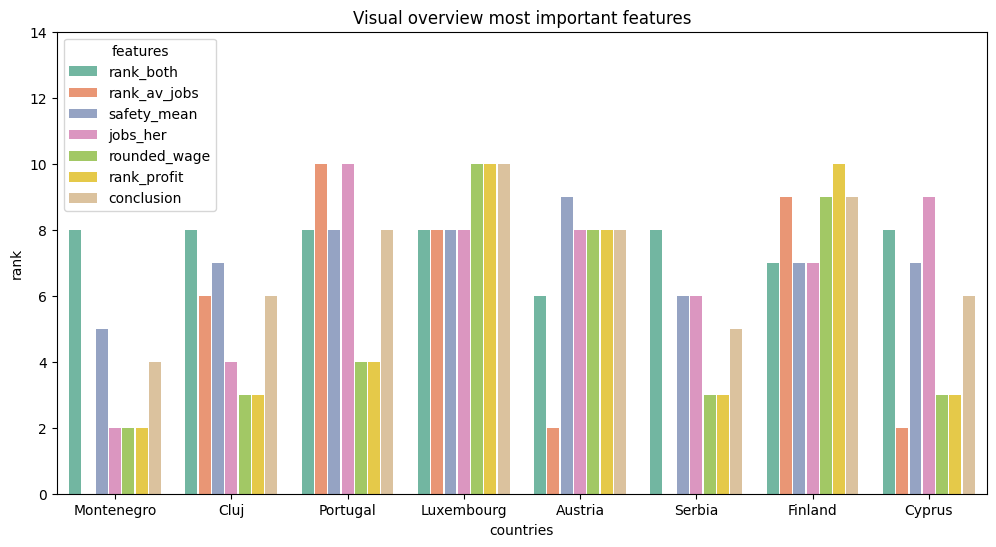

In [67]:
import seaborn as sns

bar = plt.figure(figsize=(12, 6))
plt.title("Visual overview most important features")
plt.ylim(top=14)

sns.barplot(data=conclusion_plot_data.melt(id_vars='countries',
                                  value_name='rank', var_name='features'),
            x='countries', y='rank', hue='features', palette="Set2", gap=0.1);

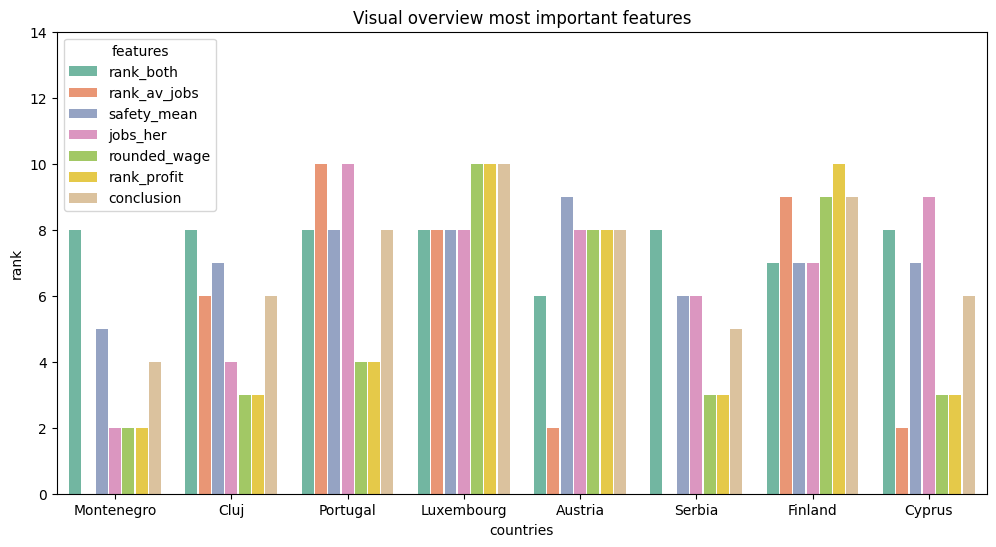

In [68]:
bar

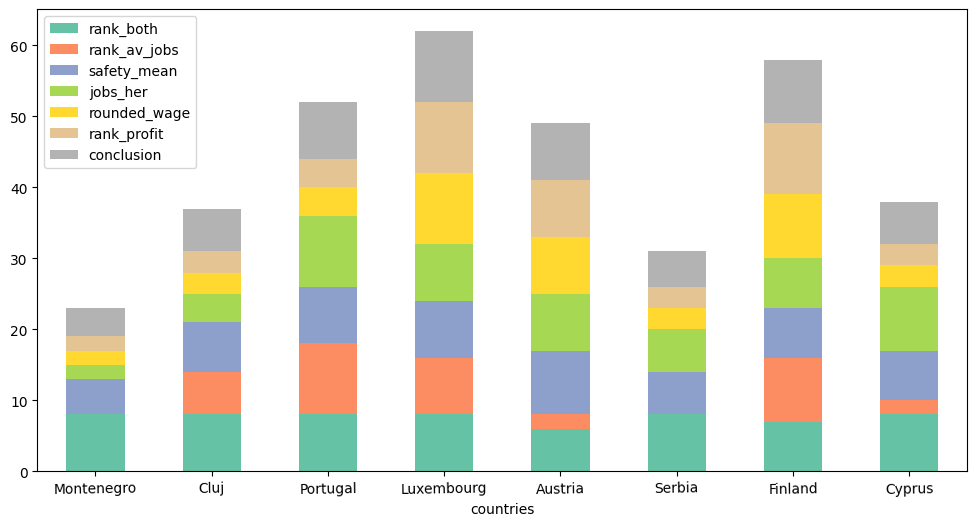

In [80]:
conclusion_plot_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap="Set2", xlabel = 'countries', rot=True);